# Analysis of Gasoline Prices and Consumption  
### INFO 511 — Final Project  
**Project Title:** *The Impact of Gasoline Prices on U.S. Gasoline Consumption (1994–2024)*  
**Author:** Nikolas Lee-Bishop  
**Date:** October 2025  

---

### **Notebook Purpose**
This notebook conducts statistical and predictive analysis on the cleaned and merged dataset produced during the Exploratory Data Analysis (EDA) phase.  
The goal is to quantify and interpret the relationship between U.S. gasoline prices and gasoline consumption, and to determine whether higher prices lead to lower consumption when accounting for inflation and other factors.

---

### **Notebook Structure**
1. **Data Loading & Preparation**  
   - Import the cleaned `merged_gasoline_data.csv` from the EDA notebook.  
   - Perform any final preprocessing or transformations as needed.  

2. **Descriptive Analysis**  
   - Review key descriptive statistics and visual trends.  
   - Check for outliers, residual skewness, and normality after transformations.  

3. **Correlation & Relationship Analysis**  
   - Compute correlation coefficients between nominal price, real (inflation-adjusted) price, and consumption.  
   - Visualize correlations with scatter and heatmap plots.  

4. **Regression Modeling**  
   - Build and evaluate linear regression models:  
     - **Model 1:** Nominal Price → Consumption  
     - **Model 2:** Inflation-Adjusted Price → Consumption  
   - Assess statistical significance, R² values, and residuals.  

5. **Additional Analyses (Optional)**  
   - Perform rolling-window regression or trend decomposition.  
   - Test for seasonality or lagged effects using autocorrelation or time-series regression.  

6. **Conclusion & Interpretation**  
   - Summarize findings and discuss implications of price elasticity and consumption behavior.  

---

### **Data Source**
Dataset used in this notebook was produced from the EDA process and saved as:  
`data/merged_gasoline_data.csv`

---

### **Dependencies**
```python
# Core libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr, spearmanr

Things to do:
- update header to keep accurate
  - include a brief summary of the EDA summary
- regression
- ??

In [49]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

## 1. Data Loading and Transformation

In [54]:
merged_df = pd.read_pickle("../Analysis/MergedData/merged_gasoline_data.pkl")

print(merged_df.shape)

merged_df.head(15)
merged_df.tail(50)

(372, 6)


,Date,Nominal_Price_USD,Inflation_Adjusted_Price_USD,Gasoline_Consumption(Millions of Gallons),Year,Month
322,2020-11-01,2.200,3.757,10081.722,2020,November
323,2020-12-01,2.284,3.743,10227.756,2020,December
324,2021-01-01,2.420,3.592,10055.766,2021,January
325,2021-02-01,2.587,3.612,9200.520,2021,February
326,2021-03-01,2.898,3.516,11136.216,2021,March
327,2021-04-01,2.948,3.341,11137.602,2021,April
328,2021-05-01,3.076,3.260,11823.168,2021,May
329,2021-06-01,3.157,3.176,11795.700,2021,June
330,2021-07-01,3.231,3.139,12104.778,2021,July
331,2021-08-01,3.255,NaN,11955.384,2021,August


In [51]:
# --- Check for missing values ---
print("🔍 Checking for missing values in merged dataset:\n")
nan_counts = merged_df.isna().sum()
total_missing = nan_counts[nan_counts > 0]

if total_missing.empty:
    print("✅ No missing values found.")
else:
    print(total_missing)
    print(f"\n⚠️ Total missing entries: {total_missing.sum()} across {len(total_missing)} columns.")

🔍 Checking for missing values in merged dataset:

Inflation_Adjusted_Price_USD    41
dtype: int64

⚠️ Total missing entries: 41 across 1 columns.


## 2. Feature Preparation

In [52]:
# --- Feature Selection ---
X = merged_df[["Inflation_Adjusted_Price_USD"]]   # independent variable
y = merged_df["Gasoline_Consumption(Millions of Gallons)"]   # dependent variable

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split into training and testing sets.")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

✅ Data split into training and testing sets.
Training samples: 297, Testing samples: 75


## 3. Fitting Simple Linear Regression

In [53]:
# --- Fit Linear Regression ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Coefficients ---
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")

# --- Evaluation ---
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 4. Visualize Results

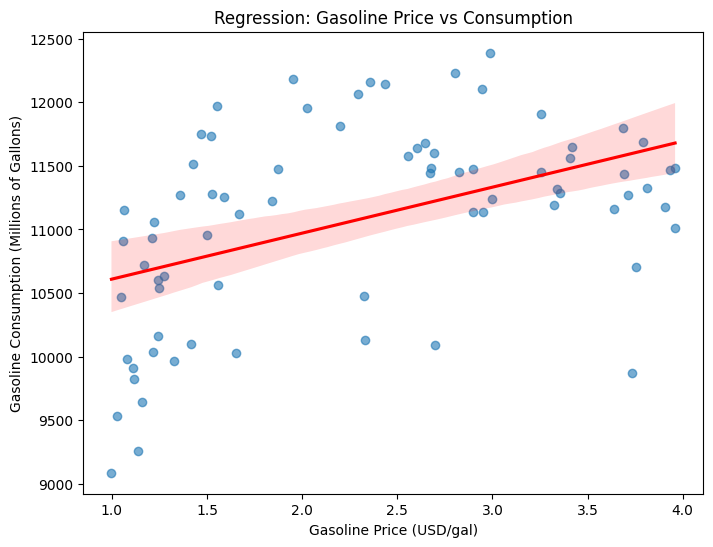

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(
    x=X_test,
    y=y_test,
    scatter_kws={'alpha':0.6, 'color':"royalblue"},
    line_kws={'color':"firebrick", 'lw':2}
)
plt.title("Regression: Gasoline Consumption vs Inflation-Adjusted Price (1993–2024)")
plt.xlabel("Gasoline Price (2024 USD per Gallon)")
plt.ylabel("Gasoline Consumption (Millions of Gallons)")
plt.show()